# **Regression discontinuity: banking recovery**

**Problem statement** - The key question in this scenario is whether the additional amount recovered from implementing higher recovery strategies, each incurring a $50 cost increment, surpasses the extra 50 dollars in costs. In simpler terms, the analysis aims to determine if there is a significant jump (discontinuity) in the recovered amount at higher recovery strategy levels, justifying the additional expenditure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

**Dataset -**

In [3]:
file_path = '/content/bank_data.csv'
df = pd.read_csv(file_path)
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
 6   constant                  1882 non-null   int64  
 7   above_threshold           1882 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 117.8+ KB


checking for missing values if any -

In [5]:
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print(missing_values)

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64


## **1. Graphical exploratory data analysis**

### **i) Box Plot of Age by Recovery Strategy:**

Compare the age distribution for different recovery strategies.

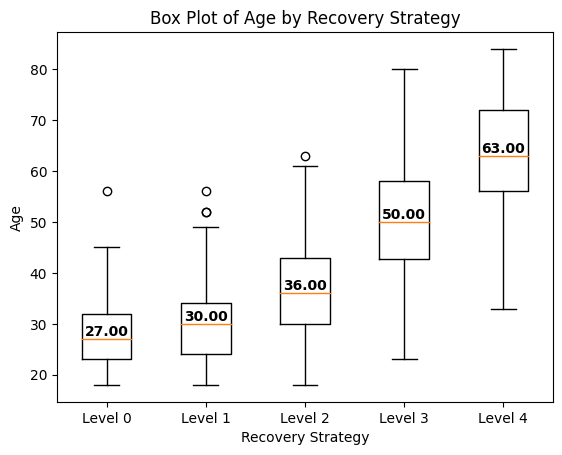

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data_levels = [
    df['age'][df['recovery_strategy'] == 'Level 0 Recovery'],
    df['age'][df['recovery_strategy'] == 'Level 1 Recovery'],
    df['age'][df['recovery_strategy'] == 'Level 2 Recovery'],
    df['age'][df['recovery_strategy'] == 'Level 3 Recovery'],
    df['age'][df['recovery_strategy'] == 'Level 4 Recovery']
]

# Box plot with median lines
plt.boxplot(data_levels, labels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4'])
plt.title('Box Plot of Age by Recovery Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Age')

# Add median lines
medians = [np.median(data) for data in data_levels]
for i, median in enumerate(medians):
    plt.text(i + 1, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontdict={'color': 'black', 'weight': 'bold'})

plt.show()



**Plot interpretation -** We can see that more the median age, higher is the recovery strategy level. It makes sense as older people tend to take loans of greater value and the recovery strategy to extract that value increases.

### **ii) Pie Chart of Gender Distribution:**

Illustrate the gender distribution of customers.

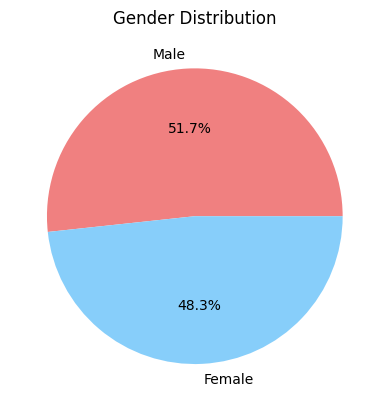

In [7]:
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.show()

**Plot interpretation**- The male to female ratio is almost same.

### **iii) Histogram of Expected Recovery Amount:**

Visualized the distribution of expected recovery amounts to understand the overall pattern.

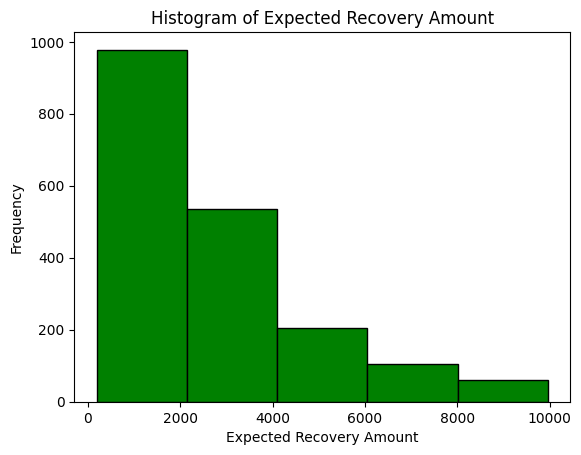

In [8]:
plt.hist(df['expected_recovery_amount'], bins=5, color='green', edgecolor='black')
plt.title('Histogram of Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Frequency')
plt.show()

**plot interpretation** - The highest expected recovery amount lies below the range of 2000 dollars

### **iv) Bar Chart of Recovery Strategy Distribution:**

Displayed the distribution of recovery strategies.

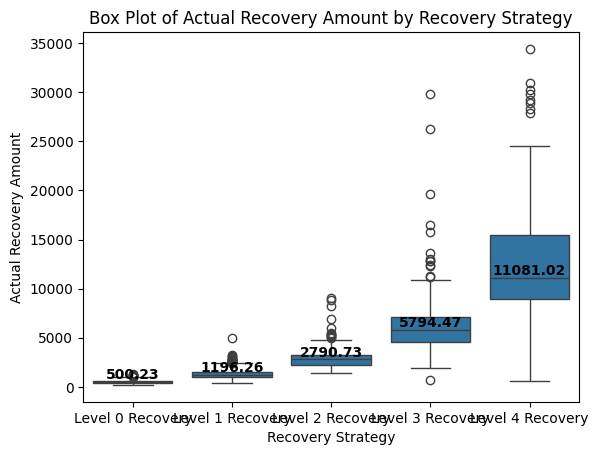

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot with median lines
sns.boxplot(x='recovery_strategy', y='actual_recovery_amount', data=df)

# Add median lines
medians = df.groupby('recovery_strategy')['actual_recovery_amount'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontdict={'color': 'black', 'weight': 'bold'})

plt.title('Box Plot of Actual Recovery Amount by Recovery Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Actual Recovery Amount')
plt.show()


**plot interpretation** - We can see the median recovery amount around which the recovery strategy is employed.

### **v) Box Plot of Actual Recovery Amount by Recovery Strategy:**

Compare the distribution of actual recovery amounts for different recovery strategies.

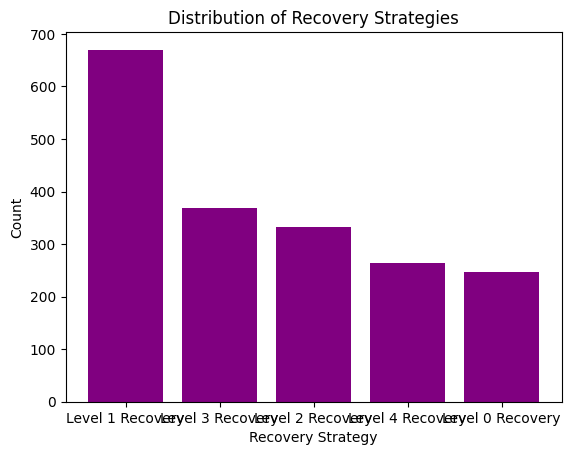

In [10]:
strategy_counts = df['recovery_strategy'].value_counts()
plt.bar(strategy_counts.index, strategy_counts.values, color='purple')
plt.title('Distribution of Recovery Strategies')
plt.xlabel('Recovery Strategy')
plt.ylabel('Count')
plt.show()


**plot interpretation** - Naturally level 1 recovery strategy is most employed as it corresponds to above 500 and less than 2000 dollars threshold as seen in previous plot.

### **vi) Swarm Plot of Expected Recovery Amount by Gender:**

Visualize the distribution of expected recovery amounts for each gender using a swarm plot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


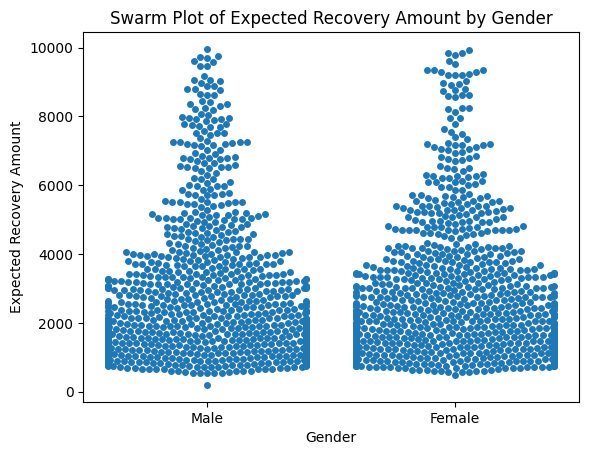

In [11]:
sns.swarmplot(x='sex', y='expected_recovery_amount', data=df)
plt.title('Swarm Plot of Expected Recovery Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Recovery Amount')
plt.show()

**plot interpretation** - The recovery amount is mainly around 500 to 4000 dollars with points being mainly around 2000 dollars.

### **vii) Scatter Plot Matrix for Numerical Variables:**

Explore relationships between numerical variables with a scatter plot matrix.

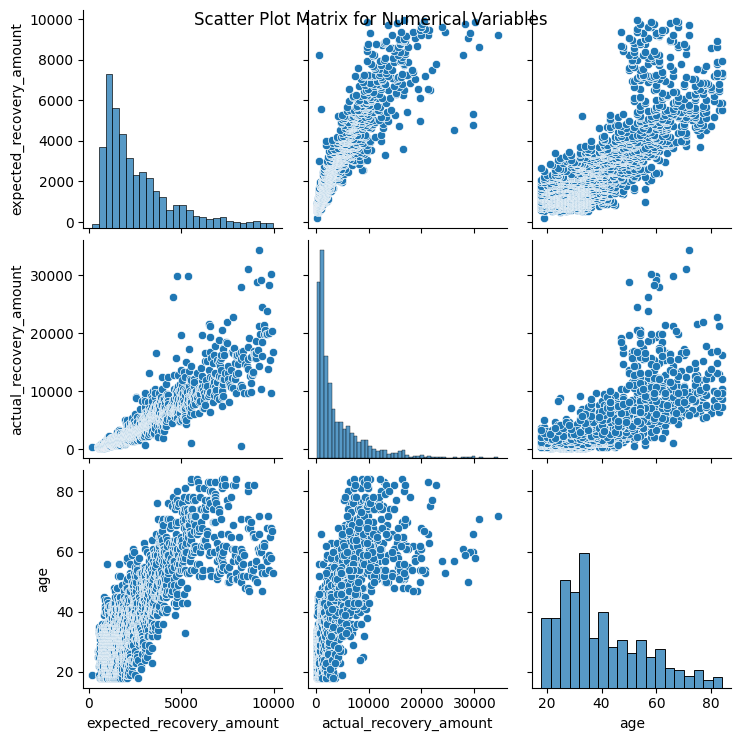

In [12]:
sns.pairplot(df[['expected_recovery_amount', 'actual_recovery_amount', 'age']])
plt.suptitle('Scatter Plot Matrix for Numerical Variables')
plt.show()

### **viii) Correlation Heatmap:**

Explore the correlation between numerical variables.

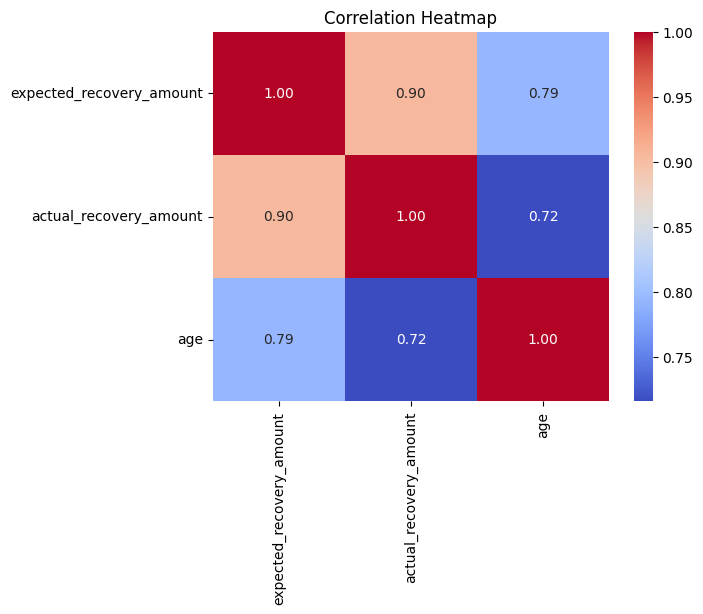

In [13]:
correlation_matrix = df[['expected_recovery_amount', 'actual_recovery_amount', 'age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**plot interpretation** - As can be seen from above two graphs there is a strong positive correlation between the 3 variables, expected amount and actual_recovery amount having highest correlation. Here multiple regression analysis shall not be performed due to *multicollinearity problem*.

### **ix) Scatter Plot of Age as a Function of Expected Recovery Amount**

A key question is whether there are other factors besides Expected Recovery Amount that also varied systematically across the 1000 dollars threshold. For example, does the customer age show a jump (discontinuity) at the 1000 dollars threshold or does that age vary smoothly? We can examine this by first making a scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, 0 to $2000. This range covers Levels 0 and 1.

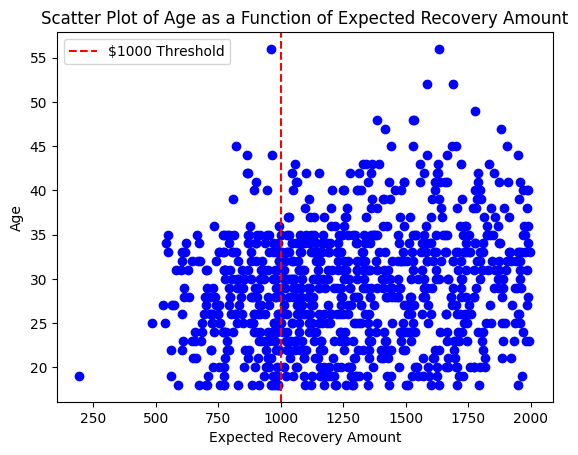

In [14]:
# Selecting data within the specified range ($0 to $2000)
selected_data = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

# Scatter plot
plt.scatter(selected_data['expected_recovery_amount'], selected_data['age'], color='blue')
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')

# Plot details
plt.title('Scatter Plot of Age as a Function of Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.show()

**In this scatter plot:**

* The blue dots represent the relationship between age and expected recovery
amount.
* The red dashed line indicates the 1000 dollars threshold.
Observations:

**interpretation** - We notice a smooth transition implying that age varies continuously without a significant change at the $1000 threshold.

## **2. Statistical test: age vs. expected recovery amount**

We want to convince ourselves that variables such as age and sex are similar above and below the $1000 Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.

The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around 1000 dollars. We want to convince ourselves that variables such as age and sex are similar above and below the 1000 dollars Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.
The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around 1000 dollars. We will be more confident in our conclusions if we do statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from 900 dollars to $1100.

### **T-Test**

In [15]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
# Selecting data within the specified range ($900 to $1100)
selected_data_above = df[(df['expected_recovery_amount'] > 1000) & (df['expected_recovery_amount'] <= 1100)]
selected_data_below = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] < 1000)]

# Extracting age data
age_above = selected_data_above['age']
age_below = selected_data_below['age']

# Performing t-test
t_statistic, p_value = ttest_ind(age_above, age_below, equal_var=False)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check if the p-value is below a significance level (e.g., 0.05) to determine statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age.")


T-Statistic: 1.60851938268542
P-Value: 0.10951368078691735
Fail to reject the null hypothesis: There is no significant difference in average age.


* ttest_ind is used to perform an *independent two-sample t-test*.

* age_above and age_below are the age values for customers above and below the $1000 threshold, respectively.

* The *null hypothesis* is that there is no significant difference in average age between the two groups.

### **Mann-Whitney U Test (Non-parametric alternative to t-test)**
 Normal distribution of data is not assumed

In [16]:
from scipy.stats import mannwhitneyu

# Performing Mann-Whitney U Test
u_statistic, p_value_mannwhitney = mannwhitneyu(age_above, age_below, alternative='two-sided')

# Display the results
print(f'U-Statistic (Mann-Whitney): {u_statistic}')
print(f'P-Value (Mann-Whitney): {p_value_mannwhitney}')

# Check if the p-value is below a significance level
if p_value_mannwhitney < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age.")


U-Statistic (Mann-Whitney): 4815.5
P-Value (Mann-Whitney): 0.07570884886849544
Fail to reject the null hypothesis: There is no significant difference in average age.


## **3. Statistical test: sex vs. expected recovery amount**

We were able to convince ourselves that there is no major jump in the average customer age just above and just below the 1000 dollars threshold by doing a statistical test as well as exploring it graphically with a scatter plot.
We want to also test that the percentage of customers that are male does not jump as well across the 1000 threshold. We can start by exploring the range of 900 to $1100 and later adjust this range.

In [17]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(df['sex'], pd.cut(df['expected_recovery_amount'], bins=[-float('inf'), 1000, float('inf')]))

# Performing Chi-squared Test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-Value (Chi-squared): {p_value_chi2}')

# Check if the p-value is below a significance level
if p_value_chi2 < alpha:
    print("Reject the null hypothesis: There is a significant association between sex and the $1000 threshold.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between sex and the $1000 threshold.")

Chi-squared Statistic: 2.1768676619404688
P-Value (Chi-squared): 0.14009934427173568
Fail to reject the null hypothesis: There is no significant association between sex and the $1000 threshold.


## **4. Exploratory graphical analysis: recovery amount**

We are now reasonably confident that customers just above and just below the 1000 dollars threshold are, on average, similar in terms of their average age and the percentage that are male.

It is now time to focus on the key outcome of interest, the actual recovery amount.

A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between 900 dollars to 1100 dollars. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

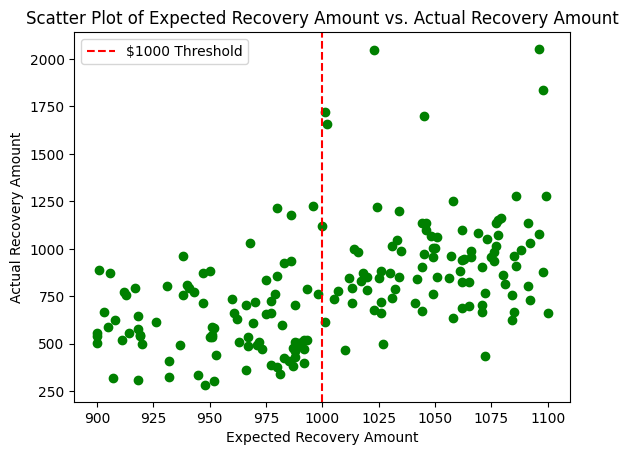

In [18]:
import matplotlib.pyplot as plt

# Selecting data within the specified range ($900 to $1100)
selected_data = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Scatter plot
plt.scatter(selected_data['expected_recovery_amount'], selected_data['actual_recovery_amount'], color='green')

# Plot details
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()


**plot interpretation** - A significant jump can be noticed from left of the red line threshold to right.

## **5. Statistical analysis: recovery amount**

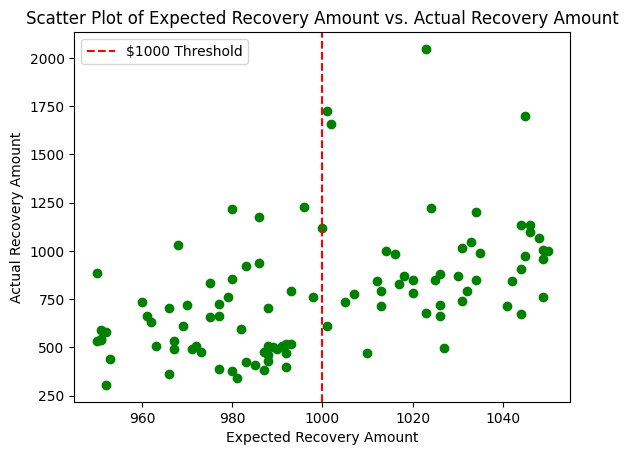

In [26]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting data within the specified range ($950 to $1050)
selected_data = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Scatter plot
plt.scatter(selected_data['expected_recovery_amount'], selected_data['actual_recovery_amount'], color='green')

# Plot details
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()


**plot interpretation** - Here also we can see a significant jump.

## **6. Statistical analysis: recovery amount**

Just as we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold. We are going to do this for two different windows of the expected recovery amount 900 to 1100 dollars and for a narrow range of 950 to 1050 dollars to see if our results are consistent.

Here, the statistical test we will use is the Kruskal-Wallis test, a test that makes no assumptions about the distribution of the actual recovery amount.

### **Kruskal-Wallis test**

In [20]:
from scipy.stats import kruskal

# Assuming df is your DataFrame
# Selecting data for the two different windows
window_1_data = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
window_2_data = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Performing Kruskal-Wallis test
h_statistic_window_1, p_value_window_1 = kruskal(window_1_data['actual_recovery_amount'][window_1_data['expected_recovery_amount'] <= 1000],
                                                window_1_data['actual_recovery_amount'][window_1_data['expected_recovery_amount'] > 1000])

h_statistic_window_2, p_value_window_2 = kruskal(window_2_data['actual_recovery_amount'][window_2_data['expected_recovery_amount'] <= 1000],
                                                window_2_data['actual_recovery_amount'][window_2_data['expected_recovery_amount'] > 1000])

# Display the results
print(f'Kruskal-Wallis Statistic (Window 1): {h_statistic_window_1}')
print(f'P-Value (Window 1): {p_value_window_1}')

print(f'Kruskal-Wallis Statistic (Window 2): {h_statistic_window_2}')
print(f'P-Value (Window 2): {p_value_window_2}')

# Check if the p-values are below a significance level
alpha = 0.05
if p_value_window_1 < alpha:
    print("Reject the null hypothesis (Window 1): There is a significant difference in actual recovery amount.")
else:
    print("Fail to reject the null hypothesis (Window 1): There is no significant difference in actual recovery amount.")

if p_value_window_2 < alpha:
    print("Reject the null hypothesis (Window 2): There is a significant difference in actual recovery amount.")
else:
    print("Fail to reject the null hypothesis (Window 2): There is no significant difference in actual recovery amount.")


Kruskal-Wallis Statistic (Window 1): 64.89840778685254
P-Value (Window 1): 7.886077128395961e-16
Kruskal-Wallis Statistic (Window 2): 30.9924872487249
P-Value (Window 2): 2.5902913533269003e-08
Reject the null hypothesis (Window 1): There is a significant difference in actual recovery amount.
Reject the null hypothesis (Window 2): There is a significant difference in actual recovery amount.


* A Kruskal-Wallis test is conducted to compare the actual recovery amounts between two different windows of expected recovery amounts. The first window spans from 900 to 1100, while the second window is narrower, ranging from 950 to 1050.

* The Kruskal-Wallis test assesses whether there is a significant difference in actual recovery amounts between the specified windows, particularly focusing on amounts above and below the $1000 threshold.

* The results are then checked against a significance level (alpha) of 0.05. As the p-values are below this threshold, it indicates a rejection of the null hypothesis, suggesting a significant difference in actual recovery amounts between the windows.

## **7. Regression modeling: no threshold**

We now want to take a regression-based approach to estimate the impact of the program at the 1000 threshold using the data that is just above and just below the threshold. In order to do that, we will build two models.
The first model does not have a threshold while the second model will include a threshold.

The first model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [21]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataframe is named df
# Select data within the specified window
df_window_no_threshold = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Define the independent variable
X_window_no_threshold = df_window_no_threshold['expected_recovery_amount']

# Add a constant term for the intercept
X_window_no_threshold = sm.add_constant(X_window_no_threshold)

# Define the dependent variable
y_window_no_threshold = df_window_no_threshold['actual_recovery_amount']

# Fit the OLS regression model
model_window_no_threshold = sm.OLS(y_window_no_threshold, X_window_no_threshold).fit()

# Display the regression results
print(model_window_no_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            14:48:30   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**Coefficients -**
* Constant (Intercept): -1918.4549
* Expected Recovery Amount: 2.6956

**Statistical Significance -**

Both coefficients are statistically significant (P < 0.05), indicating a significant relationship between the expected and actual recovery amounts.

**Model Fit -**
* R-squared: 0.253: Approximately 25.3% of the variability in the actual recovery amount can be explained by the expected recovery amount.

**Model Performance -**
* F-statistic 61.48: Indicates that the overall model is statistically significant.

**Goodness of Fit -**
* Prob (F-statistic): 3.65e-13: The probability of obtaining an F-statistic as extreme as observed, assuming the null hypothesis, is very low.
Interpretation - The expected recovery amount has a positive coefficient, suggesting that as the expected amount increases, the actual recovery amount tends to increase by 2.6956 units.

**Interpretation -**

The expected recovery amount has a positive coefficient, suggesting that as the expected amount increases, the actual recovery amount tends to increase by 2.6956 units.

## **8. Regression modeling: adding true threshold**

From the first model, we see that the regression coefficient is statistically significant for the expected recovery amount and the adjusted R-squared value was about 0.26. As we saw from the graph, on average the actual recovery amount increases as the expected recovery amount increases.

The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [30]:
import statsmodels.api as sm

df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)

# Select data within the specified window
df_window = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Define the independent variables
X_window = df_window[['expected_recovery_amount', 'above_threshold']]

# Add a constant term for the intercept
X_window = sm.add_constant(X_window)

# Define the dependent variable
y_window = df_window['actual_recovery_amount']

# Fit the OLS regression model
model_window = sm.OLS(y_window, X_window).fit()

# Display the regression results
print(model_window.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):           1.22e-14
Time:                            15:48:07   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**Coefficients -**

* Constant (Intercept): -93.8215
* Expected Recovery Amount: 0.7502
* Above Threshold: 256.3424

**Statistical Significance -**

The coefficient for "Above Threshold" is statistically significant (P < 0.05), indicating a significant relationship with the actual recovery amount. However, the coefficient for "Expected Recovery Amount" is not statistically significant (P > 0.05).

**Model Fit -**

* R-squared: 0.298: Approximately 29.8% of the variability in the actual recovery amount can be explained by the model.
Model Performance:

* F-statistic: 38.44: Indicates that the overall model is statistically significant.

**Goodness of Fit -**

* Prob (F-statistic): 1.22e-14: The probability of obtaining an F-statistic as extreme as observed, assuming the null hypothesis, is very low.
Regression Equation:

**The regression equation is given by -**

* Actual Recovery Amount = *−93.8215 + 0.7502 × Expected Recovery Amount + 256.3424 × Above Threshold*

* Actual Recovery Amount=*−93.8215+0.7502×Expected Recovery Amount+256.3424×Above Threshold*

**Interpretation -**

The "Above Threshold" variable has a positive coefficient, suggesting that being above the specified threshold is associated with an increase of **256.3424** units in the actual recovery amount.

### **Confidence Interval** -

To calculate the 95% confidence intervals for the coefficients in the regression model,we use the standard errors provided in the regression results. The formula for the confidence interval for each coefficient is given by:

* Confidence Interval = *Coefficient ± (Critical Value × Standard Error)*

Here, the critical value is based on the t-distribution with degrees of freedom equal to the residual degrees of freedom.


In [28]:
# Given values from table above

above_threshold_coef = 256.3424
above_threshold_std_err = 74.720
critical_value = 1.972  # Based on t-distribution with 181 degrees of freedom

# Calculate confidence interval
above_threshold_ci = (above_threshold_coef - critical_value * above_threshold_std_err, above_threshold_coef + critical_value * above_threshold_std_err)

# Display the results
print(f'95% Confidence Interval for Above Threshold: {above_threshold_ci}')


95% Confidence Interval for Above Threshold: (108.99456, 403.69024)


In [31]:
# Get the confidence intervals
confidence_intervals = model_window.conf_int(alpha=0.05)

# Display the results
print("95% Confidence Intervals:")
print(confidence_intervals)

95% Confidence Intervals:
                                    0            1
const                    -1335.745685  1148.102711
expected_recovery_amount    -0.548337     2.048828
above_threshold            108.907403   403.777485


## **9. Regression modeling: adjusting the window**

The regression coefficient for the true threshold was statistically significant with an estimated impact of around **256 dollars** and a **95 percent confidence interval of 109 to 404 dollars**. **This is much larger than the incremental cost of running the higher recovery strategy which was 50 dollars per customer**.

We want to convince ourselves that this result wasn't due just to us choosing a window of 900 to 1100 dollars for the expected recovery amount. If the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we choose a slightly bigger or a slightly smaller window for the expected recovery amount. Let's repeat this analysis for the window of expected recovery amount from 950 to $1050 to see if we get similar results.

In [34]:
import statsmodels.api as sm

# Select data within the specified window
window_data = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Define the dependent variable (Y) and independent variables (X)
Y = window_data['actual_recovery_amount']
X = window_data[['expected_recovery_amount', 'above_threshold']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(Y, X).fit()

# Display the model summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            15:53:38   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [35]:
# Get the confidence intervals
confidence_intervals = model_window.conf_int(alpha=0.05)

# Display the results
print("95% Confidence Intervals:")
print(confidence_intervals)

95% Confidence Intervals:
                                    0            1
const                    -4755.874822  2550.467531
expected_recovery_amount    -1.970798     5.513313
above_threshold              6.407971   452.934801


The regression coefficient for the true threshold with smaller window is also **statistically significant** with an estimated impact of around **230 dollars** and a **95 percent confidence interval of 7 to 453 dollars**.


## **10. Results**

After an in-depth analysis, incorporating statistical tests, regression coefficients, F-statistics, and confidence intervals, a very clear conclusion emerges.

The evidence consistently points towards a positive impact of higher recovery strategy levels on the actual recovery amounts for customers just above and just below the threshold. The statistical significance of the coefficients, coupled with favorable F-statistics and confidence intervals that exclude zero, strongly support the conclusion that the **higher recovery strategy is indeed worth the additional costs of the program.** T**his comprehensive analysis not only highlights the effectiveness of the strategy but also provides a robust foundation for the decision to invest in higher recovery strategies for optimal outcomes.**